<a href="https://colab.research.google.com/github/NPranaya7/Portfolio_Projects/blob/main/Python/Airline_Revenue%20/Airlines_Finance_602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 602 - Intro Data Analysis and ML
# Airline Revenue



#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Reading the Data 
- Performing EDA
  - Removing unnecessary Columns from the Data
  - Converting the String data into Numeric data
  - makeing the Year column to datetime and make it as Index
  - Converting the Quaterly data to Monthly Data with the help of interpolate.

In [ ]:
df_O = pd.read_csv("Operating_Rev.csv")
df_O.columns = df_O.iloc[0]
df_O = df_O.drop(index = 0)
df_O = df_O.dropna()
df_O = df_O.loc[df_O['Quarter'] != "TOTAL"]
df_O = df_O.reset_index()
df_O = df_O.drop(['index'],axis = 1)
#df_O = df_O.drop(['index','LATIN AMERICA','ATLANTIC','PACIFIC'],axis = 1)
df_O = df_O.replace(['1','2','3','4'],['3', '6','9','12'])
df_O['Year'] = df_O['Year'] + '-'+ df_O['Quarter']
df_O['DOMESTIC'] = df_O['DOMESTIC'].str.replace(',','')
df_O['INTERNATIONAL'] = df_O['INTERNATIONAL'].str.replace(',','')
df_O['PACIFIC'] = df_O['PACIFIC'].str.replace(',','')
df_O['LATIN AMERICA'] = df_O['LATIN AMERICA'].str.replace(',','')
df_O['ATLANTIC'] = df_O['ATLANTIC'].str.replace(',','')
df_O['TOTAL'] = df_O['TOTAL'].str.replace(',','')
cols = df_O.columns
df_O[cols] = df_O[cols].apply(pd.to_numeric,  errors='ignore')
df_O['Year'] = pd.to_datetime(df_O['Year'])
#df_O['Year'] = pd.to_datetime(df_O['Year']).dt.to_period('M')
df_O

,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
0,2000-03-01,3,23262183,1639679,2690229,2240370,370524,30202987
1,2000-06-01,6,25573067,1626743,3419032,2432840,390007,33441689
2,2000-09-01,9,25313087,1776933,3796968,2801208,370491,34058686
3,2000-12-01,12,24751473,1761932,3113734,2545414,372305,32544858
4,2001-03-01,3,23620312,1848448,2913460,2319491,409925,31111636
...,...,...,...,...,...,...,...,...
85,2021-06-01,6,35276277,3570739,3870582,3146913,1596887,47461399
86,2021-09-01,9,41300066,4043858,5132636,3216892,1680301,55373753
87,2021-12-01,12,43918677,4330499,5381293,3471123,1824171,58925763
88,2022-03-01,3,41233121,4587336,5084736,3423807,1673416,56002415


#### Dealing with missing value 

In [ ]:
df_O['Year'] = pd.to_datetime(df_O['Year']).dt.to_period('M')
df_O = df_O.set_index('Year').resample('M').interpolate()

- Interploation is a very common method for missing Values in the data. the interpolation estimates the missing values by assuming a relationship within a range of data points.


In [ ]:
df_O.drop(columns = 'Quarter').to_timestamp()

,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
Year,,,,,,
2000-03-01,2.326218e+07,1.639679e+06,2.690229e+06,2.240370e+06,3.705240e+05,3.020299e+07
2000-04-01,2.403248e+07,1.635367e+06,2.933163e+06,2.304527e+06,3.770183e+05,3.128255e+07
2000-05-01,2.480277e+07,1.631055e+06,3.176098e+06,2.368683e+06,3.835127e+05,3.236212e+07
2000-06-01,2.557307e+07,1.626743e+06,3.419032e+06,2.432840e+06,3.900070e+05,3.344169e+07
2000-07-01,2.548641e+07,1.676806e+06,3.545011e+06,2.555629e+06,3.835017e+05,3.364735e+07
...,...,...,...,...,...,...
2022-02-01,4.212831e+07,4.501724e+06,5.183588e+06,3.439579e+06,1.723668e+06,5.697686e+07
2022-03-01,4.123312e+07,4.587336e+06,5.084736e+06,3.423807e+06,1.673416e+06,5.600242e+07
2022-04-01,4.592453e+07,4.905259e+06,6.316393e+06,3.525172e+06,1.770960e+06,6.244231e+07


# Total Revenue
- Implementing Time Series Models on Total Revenue Generated by all Major US carrier opertated from Major US airports

In [ ]:
df = df_O['TOTAL']

In [ ]:
df = df.to_timestamp()

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,TOTAL
Year,
2000-03-01,3.020299e+07
2000-04-01,3.128255e+07
2000-05-01,3.236212e+07
2000-06-01,3.344169e+07
2000-07-01,3.364735e+07


#### Plotting

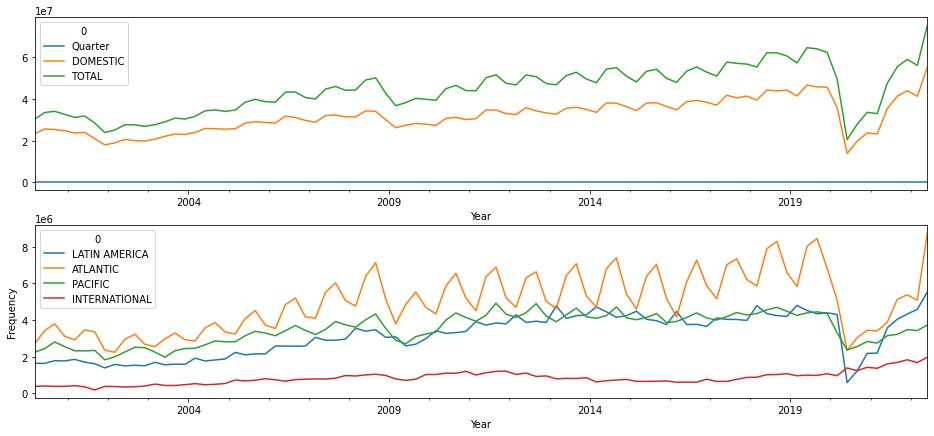

In [ ]:
fig, ax = plt.subplots(figsize = (16 , 7),nrows=2, ncols=1)
#fig, axes = plt.subplots(nrows=2, ncols=2)

df_O.drop(['Quarter','DOMESTIC','TOTAL'],axis = 1).plot(ax = ax[1])
df_O.drop(['PACIFIC','ATLANTIC','LATIN AMERICA','INTERNATIONAL'],axis = 1).plot(ax = ax[0])

#plt.title('Airline Operating Revenue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## Plotting Trend, seasonality, cyclicality, and noise graph of the the data of Total Revenue 

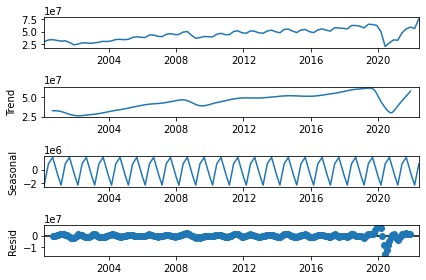

In [ ]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(df, model='additive', period=12)
result.plot()
pyplot.show()

- In the first graph, we see the behavior of the raw data.it has a upward trend despite a drop at the end of the first quarter of 2020.
- The second plot exhibits the trend of the data. Trend shows the overall movement of a time series.
- Seasonality is the third plot which shows periodical ups and downs in the data.
- The last graph show the residuals.After eliminating the trend and seasonal components from the time series, this was generated. If the residual is steady in the end, Then our data has a stationary structure and is prepared to go on to the modeling phase. but my data in residuals at end is not stedy so in next step we need to do the stationarity check and differencing

In [ ]:
df

,TOTAL
Year,
2000-03-01,3.020299e+07
2000-04-01,3.128255e+07
2000-05-01,3.236212e+07
2000-06-01,3.344169e+07
2000-07-01,3.364735e+07
...,...
2022-02-01,5.697686e+07
2022-03-01,5.600242e+07
2022-04-01,6.244231e+07


## Stationarity Check
- Before Modeling the data we need to Check the Stationarity of the data
- if the Data is not stationary then we need to make the data stationary by differencing the data.
- A stationary data is one whose properties do not depend on the previous values of data at which the series is observed. 
- the trend and seasonality will affect the value of the time series at different times.

### ADF (Augmented Dickey Fuller)
- ADF test is one of the statistical check to see wheather the data is Stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(df)
print('The statistic value is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The statistic value is -1.9218267237545246 and p-value is 0.32186381639991424


- the p-value of the data suggests that the time series is non-stationary as it is higher than 0.05 
- Now we need to make the Data Stationary by applying differencing to it

#### ACF test is also one  of the statistical check to see wheather the data is Stationary or not

### ACF (Auto Correlation Function)
- The longer of the bar in the acf plot, the more dependence a series has.

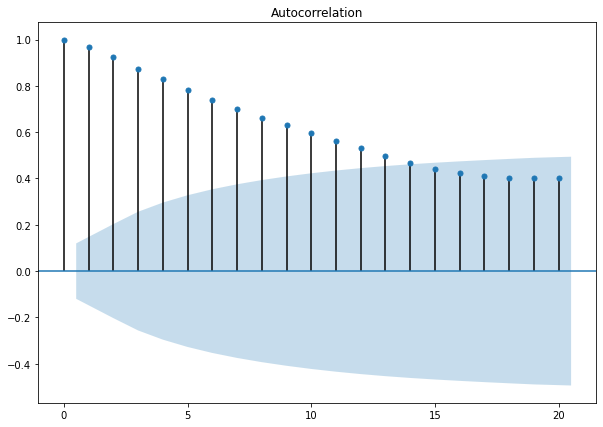

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_acf(df, lags=20,ax =ax);

- The acf plot indicates that acf is slowly decaying, which is an indicator of non-stationarity.
- The Blue Shaded area represents the confidence interval
- If the bar falls inside this confidence interval, it means that there is no significant correlation between the lag and current node. it is used to identife the optimal lag
- this order of this ACF model is used in the MOving Average 

### PACF 
- PACF is another model to check the stationarity of data 
- PACF model provides information on correlation between current value of a time series and its lagged values controlling for the other correlations.

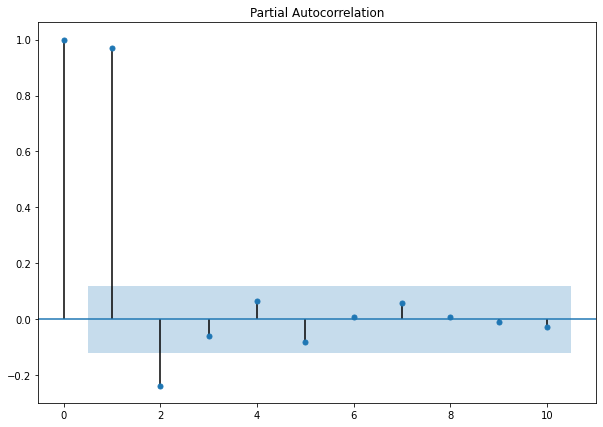

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_pacf(df, lags=10,ax =ax);

### Differencing
- Inorder to make the data stationary we need to differentiate the data 
- we can differeniate the data n times until the p value in ADF is below 0.05

In [ ]:
df_diff = df.diff()

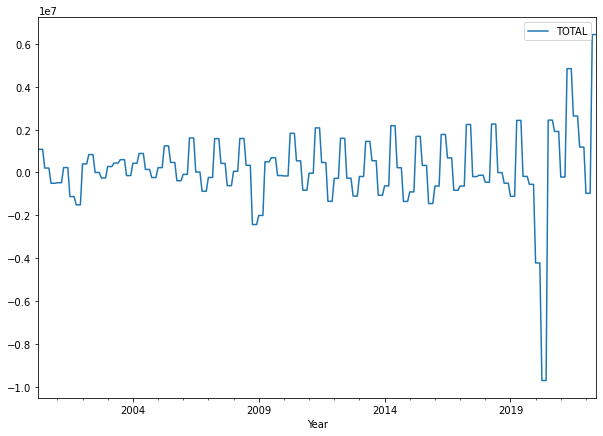

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
df_diff = df_diff.dropna()
df_diff.plot(ax = ax)

### ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(df_diff)
print('The statistic value is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The statistic value is -3.426113249767509 and p-value is 0.010100237992522456


- the p-value is below 0.05 
- now data become stationary 

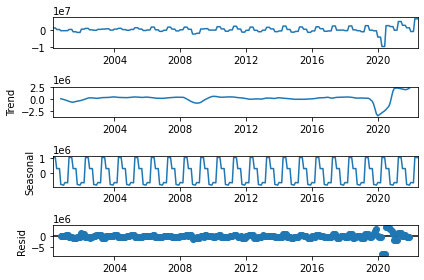

In [ ]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(df_diff, model='additive', period=12)
result.plot()
pyplot.show()

### ACF

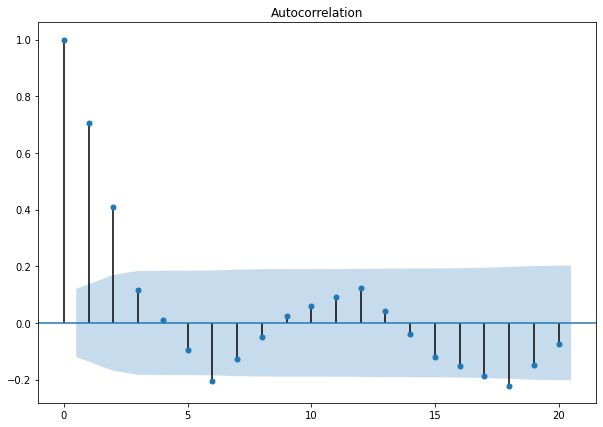

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_acf(df_diff, lags=20,ax =ax);

- The above-given acf plot exhibits that there is a spike at the 2nd and 
6th lags.
- the larger lag work better so i choose lag 2nd


### PACF

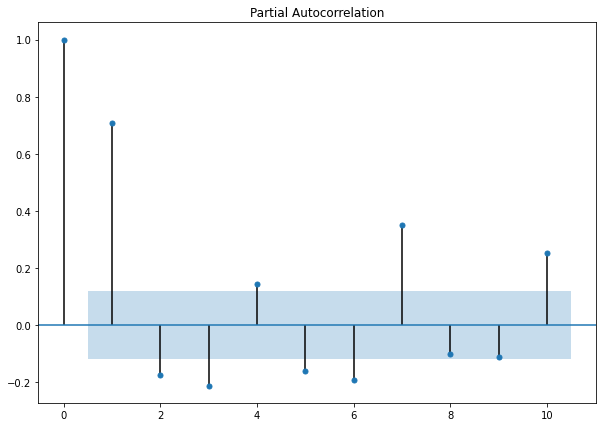

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_pacf(df_diff, lags=10,ax =ax);

- The above-given pacf plot exhibits that there is a spike at mostly all lags 
- the larger lag(Spike) work better so i choose lag 7th. 


## Moving Average

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
df_diff = df.diff().dropna()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
train_len = int(len(df_diff) * 0.75)
dtrain = df_diff[:train_len]
dtest  = df_diff[train_len:]

In [ ]:
start = len(dtrain)
end = len(dtrain) + len(dtest) - 1

In [ ]:
ma_model = ARIMA(dtrain, order=(0, 0, 6))
ma_result = ma_model.fit()

In [ ]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = dtest.index

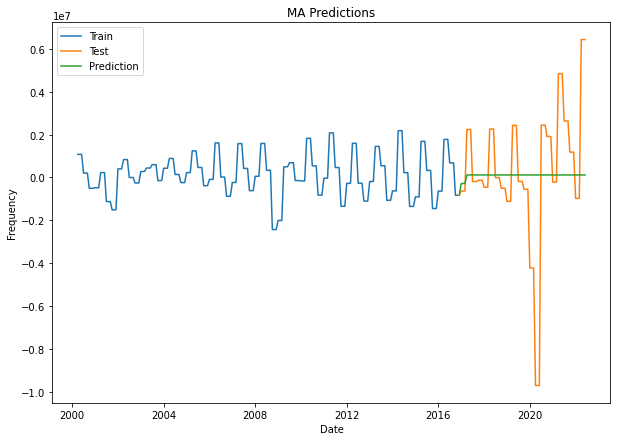

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(dtrain.index,dtrain, label = 'Train')
plt.plot(dtest.index,dtest, label = 'Test')
plt.plot(ma_pred.index,ma_pred, label = 'Prediction')
plt.title("MA Predictions")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mae_MA = mean_absolute_error(dtest, ma_pred)
mse_MA = mean_squared_error(dtest, ma_pred)
rmse_MA = np.sqrt(mean_squared_error(dtest, ma_pred))

In [ ]:
print("Predictive Performance of \nMAE = {}  \nMSE = {} \nRMSE ={} ".format(mae_MA ,mse_MA, rmse_MA))

Predictive Performance of 
MAE = 2031937.2170573883  
MSE = 9532594806548.484 
RMSE =3087490.049627445 


In [ ]:
ma_perf = {'mae_MA': mae_MA,
             'mse_MA':mse_MA,
             'rmse_MA':rmse_MA}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_MA,mse_MA,rmse_MA
0,2.031937e+06,9.532595e+12,3.087490e+06


In [ ]:
ma_model = ARIMA(df_diff, order=(0, 0, 6))
ma_result = ma_model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
forecast_index = pd.date_range(dtest.index[-1]+ pd.DateOffset(months=1), periods=24 ,freq = 'MS')
ma_forecast = ma_result.forecast(steps=24)
ma_forecast.index = forecast_index

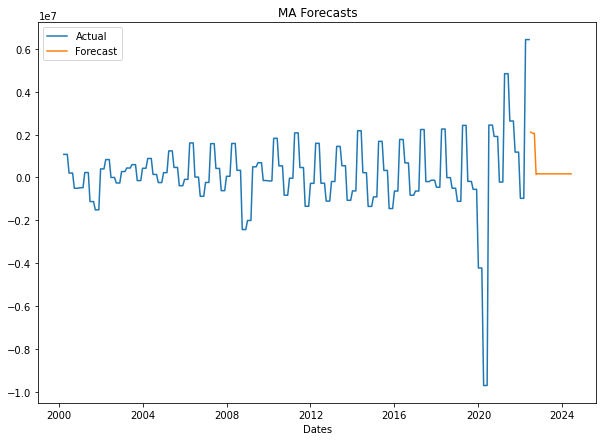

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(df_diff.index, df_diff, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Dates')
plt.show()

## Autoregressive model

In [ ]:
train_lenarm = int(len(df_diff) * 0.75)
dtrain_arm = df_diff[:train_lenarm]
dtest_arm  = df_diff[train_lenarm:]

In [ ]:
start = len(dtrain_arm)
end = len(dtrain_arm) + len(dtest_arm) - 1

In [ ]:
arm_model = ARIMA(dtrain_arm, order=(3, 0, 0))
arm_result = arm_model.fit()

In [ ]:
arm_pred = arm_result.predict(start, end)
arm_pred.index = dtest_arm.index

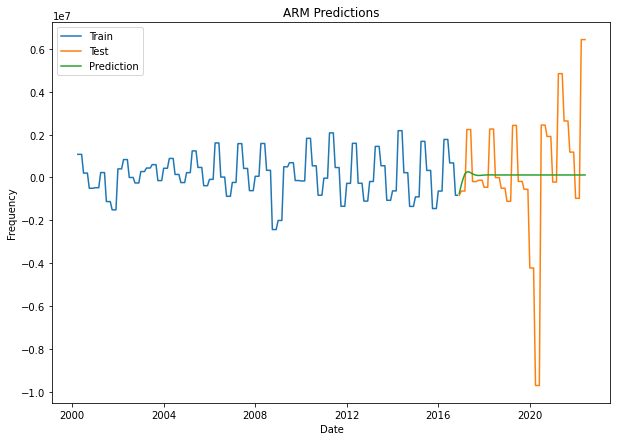

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(dtrain_arm.index,dtrain_arm, label = 'Train')
plt.plot(dtest_arm.index,dtest_arm, label = 'Test')
plt.plot(arm_pred.index,arm_pred, label = 'Prediction')
plt.title("ARM Predictions")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [ ]:
arm_model = ARIMA(df_diff, order=(3, 0, 0))
arm_result = arm_model.fit()

In [ ]:
forecast_indexarm = pd.date_range(df_diff.index[-1]+ pd.DateOffset(months=1), periods=24 ,freq = 'MS')

In [ ]:
arm_forecast = arm_result.forecast(steps=24)
arm_forecast.index = forecast_indexarm

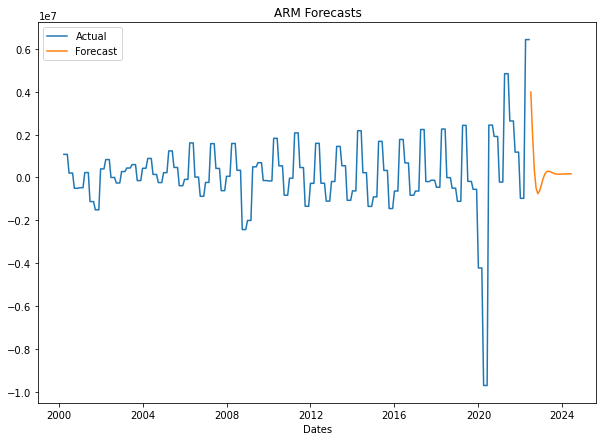

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(df_diff.index, df_diff, label='Actual')
plt.plot(arm_forecast.index, arm_forecast, label='Forecast')
plt.legend()
plt.title('ARM Forecasts')
plt.xlabel('Dates')
plt.show()

In [ ]:
mae_arm = mean_absolute_error(dtest_arm, arm_pred)
mse_arm = mean_squared_error(dtest_arm, arm_pred)
rmse_arm = np.sqrt(mean_squared_error(dtest_arm, arm_pred))
print("Predictive Performance of Autoregressive model is \nMAE = {}  \nMSE = {} \nRMSE ={} ".format(mae_arm ,mse_arm, rmse_arm))

Predictive Performance of Autoregressive model is 
MAE = 2035881.3735889925  
MSE = 9518187655345.832 
RMSE =3085156.0179909593 


In [ ]:
ar_perf = {'mae_ARM': mae_arm,
             'mse_ARM':mse_arm,
             'rmse_ARM':rmse_arm}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ARM,mse_ARM,rmse_ARM
0,2.035881e+06,9.518188e+12,3.085156e+06


## ARMA

In [ ]:
train_len = int(len(df_diff) * 0.75)
dtrain = df_diff[:train_len]
dtest  = df_diff[train_len:]

In [ ]:
start = len(dtrain)
end = len(dtrain) + len(dtest) - 1

In [ ]:
arma_model = ARIMA(dtrain, order=(3, 0, 6))
arma_results = arma_model.fit()

In [ ]:
arma_pred = arma_results.predict(start, end)
arma_pred.index = dtest.index

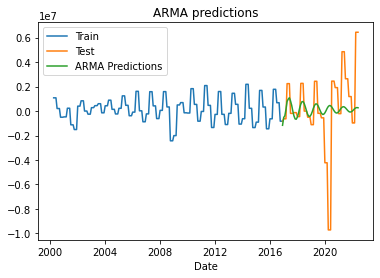

In [ ]:
plt.plot(dtrain, label='Train')
plt.plot(dtest, label='Test')
plt.plot(arma_pred, label='ARMA Predictions')
plt.title('ARMA predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
mae_arma = mean_absolute_error(dtest, arma_pred)
mse_arma = mean_squared_error(dtest, arma_pred)
rmse_arma = np.sqrt(mean_squared_error(dtest, arma_pred))

In [ ]:
arma_perf = {'mae_arma':mae_arma,
            'mse_arma':mse_arma,
            'rmse_arma':rmse_arma}
arma_perf = pd.DataFrame([arma_perf])
arma_perf

,mae_arma,mse_arma,rmse_arma
0,1.942005e+06,9.325340e+12,3.053742e+06


In [ ]:
forecast_index = pd.date_range(dtest_arm.index[-1]+ pd.DateOffset(months=1), periods=24 ,freq = 'MS')

In [ ]:
arma_model = ARIMA(df_diff, order=(3, 0, 6)).fit()
arma_forecast = arma_model.forecast(steps=24)
arma_forecast.index = forecast_index

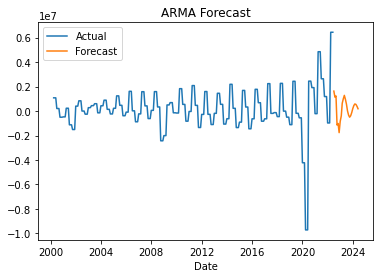

In [ ]:
plt.plot(df_diff, label='Actual')
plt.plot(arma_forecast, label='Forecast')
plt.title('ARMA Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

## ARIMA

In [ ]:
train_len = int(len(df) * 0.75)
train = df[:train_len]
test  = df[train_len:]

In [ ]:
arima_model = ARIMA(train, order=(3,1,6))
arima_results = arima_model.fit()

In [ ]:
arima_predict = arima_results.predict(start, end)
arima_predict.index = test.index


# arima_predict = arima_results.predict(start, end)
# arima_predict.index = test.index

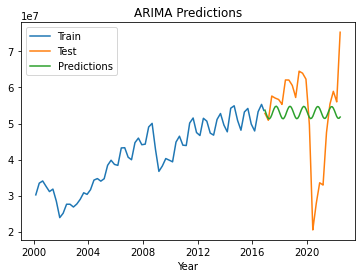

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_predict, label='Predictions')
plt.title('ARIMA Predictions')
plt.legend()
plt.xlabel('Year')
plt.show()

In [ ]:
arima_pred_diff = arima_predict.diff().dropna()

In [ ]:
mae_arima = mean_absolute_error(dtest.iloc[1:], arima_pred_diff)
mse_arima = mean_squared_error(dtest.iloc[1:], arima_pred_diff)
rmse_arima = np.sqrt(mean_squared_error(dtest.iloc[1:], arima_pred_diff))

In [ ]:
arima_perf = {'mae_arima': mae_arima,
             'mse_arima':mse_arima,
             'rmse_arima':rmse_arima}
arima_perf = pd.DataFrame([arima_perf])
arima_perf

,mae_arima,mse_arima,rmse_arima
0,1.948824e+06,9.210013e+12,3.034800e+06


In [ ]:
forecast_index = pd.date_range(test.index[-1]+ pd.DateOffset(months=1), periods=24 ,freq = 'MS')

In [ ]:
arima_model = ARIMA(df, order=(3, 1, 6)).fit()
arima_forecast = arima_model.forecast(steps=24)
arima_forecast.index = forecast_index


# arima_model = ARIMA(df, order=(7, 1, 6)).fit()
# arima_forecast = arima_model.forecast(steps=10)
# arima_forecast.index = forecast_index

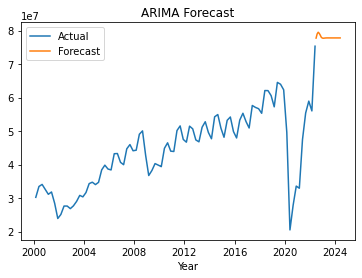

In [ ]:
plt.plot(df, label='Actual')
plt.plot(arima_forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.legend()
plt.show()

## SARIMA

In [ ]:
train_len = int(len(df) * 0.75)
train = df[:train_len]
test  = df[train_len:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarima_model = SARIMAX(train, order=(3, 1, 6), seasonal_order=(2 , 1 , 2 , 12))
sarima_results = sarima_model.fit(disp=0)

In [ ]:
sarima_pred = sarima_results.predict(start, end)
sarima_pred.index = test.index



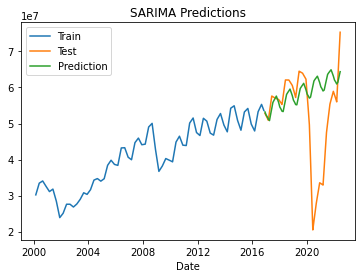

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sarima_pred, label='Prediction')
plt.legend()
plt.title('SARIMA Predictions')
plt.xlabel('Date')
plt.show()

In [ ]:
sarima_pred_diff = sarima_pred.diff().dropna()

In [ ]:
mae_sarima = mean_absolute_error(dtest.iloc[1:], sarima_pred_diff)
mse_sarima = mean_squared_error(dtest.iloc[1:], sarima_pred_diff)
rmse_sarima = np.sqrt(mean_squared_error(dtest.iloc[1:], sarima_pred_diff))

In [ ]:
sarima_perf = {'mae_sarima': mae_sarima,
             'mse_sarima':mse_sarima,
             'rmse_sarima':rmse_sarima}
sarima_perf = pd.DataFrame([sarima_perf])
sarima_perf


,mae_sarima,mse_sarima,rmse_sarima
0,1.884872e+06,9.152446e+12,3.025301e+06


In [ ]:
forecast_index = pd.date_range(test.index[-1]+ pd.DateOffset(months=1), periods=12 ,freq = 'MS')

In [ ]:
sarima_model = SARIMAX(df, order=(3, 1, 6), seasonal_order=(2, 1, 2 , 12))
sarima_results = sarima_model.fit(disp=0)
sarima_forecast = sarima_results.forecast(steps=12)
sarima_forecast.index = forecast_index

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


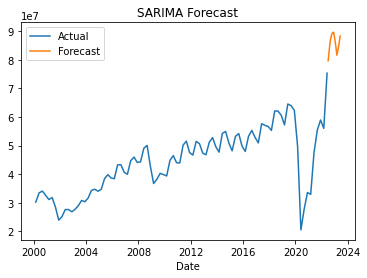

In [ ]:
plt.plot(df, label='Actual')
plt.plot(sarima_forecast, label='Forecast')
plt.title('SARIMA Forecast')
plt.legend()
plt.xlabel('Date')
plt.show()

## Performance Measurment


In [ ]:
basic_perf = pd.concat([ma_perf.T, ar_perf.T, arma_perf.T, arima_perf.T, sarima_perf.T])
basic_perf = basic_perf.rename(columns={0:'results'})

#### Mean Absolute error
- This is a commonly used performance evaluation metric in regression model 
- The discrepancy between the predicted value and the actual observations is known as the absolute error. This tells us how much on average the model predictions are off from the actual values.

In [ ]:
basic_mae = basic_perf[basic_perf.index.str.contains('mae')] # Mean Absolute error
basic_mae.sort_values(by=['results'], ascending=True)

,results
mae_sarima,1.884872e+06
mae_arma,1.942005e+06
mae_arima,1.948824e+06
mae_MA,2.031937e+06
mae_ARM,2.035881e+06


#### Mean Squared Error
- MSE provides information on how much forecasts deviate from actual values, this is just like MAE does.

In [ ]:
basic_mse = basic_perf[basic_perf.index.str.contains('^mse')] # mean square error
basic_mse.sort_values(by=['results'], ascending=True)

,results
mse_sarima,9.152446e+12
mse_arima,9.210013e+12
mse_arma,9.325340e+12
mse_ARM,9.518188e+12
mse_MA,9.532595e+12


#### Root Mean Squared Error
- This is another similar performance metric. it calculate the difference between prediction and actual values, 

In [ ]:
basic_rmse = basic_perf[basic_perf.index.str.contains('rmse')] # rooot Mean Square error
basic_rmse.sort_values(by=['results'], ascending=True)

,results
rmse_sarima,3.025301e+06
rmse_arima,3.034800e+06
rmse_arma,3.053742e+06
rmse_ARM,3.085156e+06
rmse_MA,3.087490e+06


In [ ]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.921827
p-value                          0.321864
#Lags Used                      10.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64
